In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Keras support loading the data source directly

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [50]:
train_labels.shape

(60000,)

**Preprocess data**

Sample: show the first image of the dataset

In [52]:
test_images.shape

(10000, 28, 28)

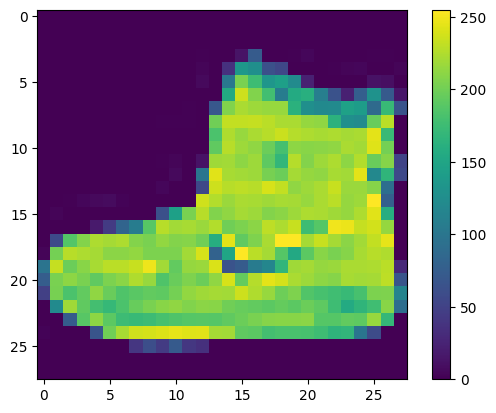

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

Normalize the data, make them between 0,1

In [14]:
train_images = train_images / 255
test_images = test_images / 255

Debug shape of images

In [35]:
test_images.shape

(10000, 28, 28)

In [33]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Define class name of classify classes

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Base on the dataset

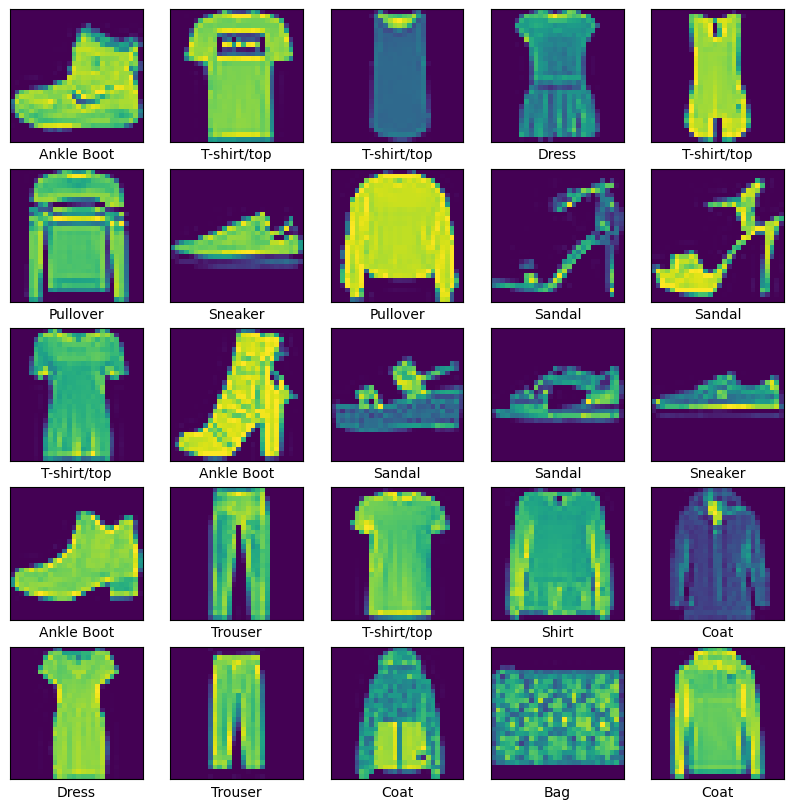

In [27]:
plt.figure(figsize=(10, 10))
for i in range(25): # Show the first 25 items as sample
    plt.subplot(5,5,i+1)      # 5 row 5 column, each row has 5 items
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

In [29]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)        # Classify into 10 class names
])

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Correct way in TensorFlow 2.x
    loss="sparse_categorical_crossentropy",  # Fixed typo
    metrics=['accuracy']
)

In [38]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7770 - loss: 0.6364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8648 - loss: 0.3798
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8841 - loss: 0.3140
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8902 - loss: 0.2977


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3499
Test Accuracy:  0.8762999773025513
Test Loss:  0.3514614403247833


In [41]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


9 -> Ankle Boot

In [44]:
np.argmax(predictions[0])

9

Now, plot to see the predictions on different images

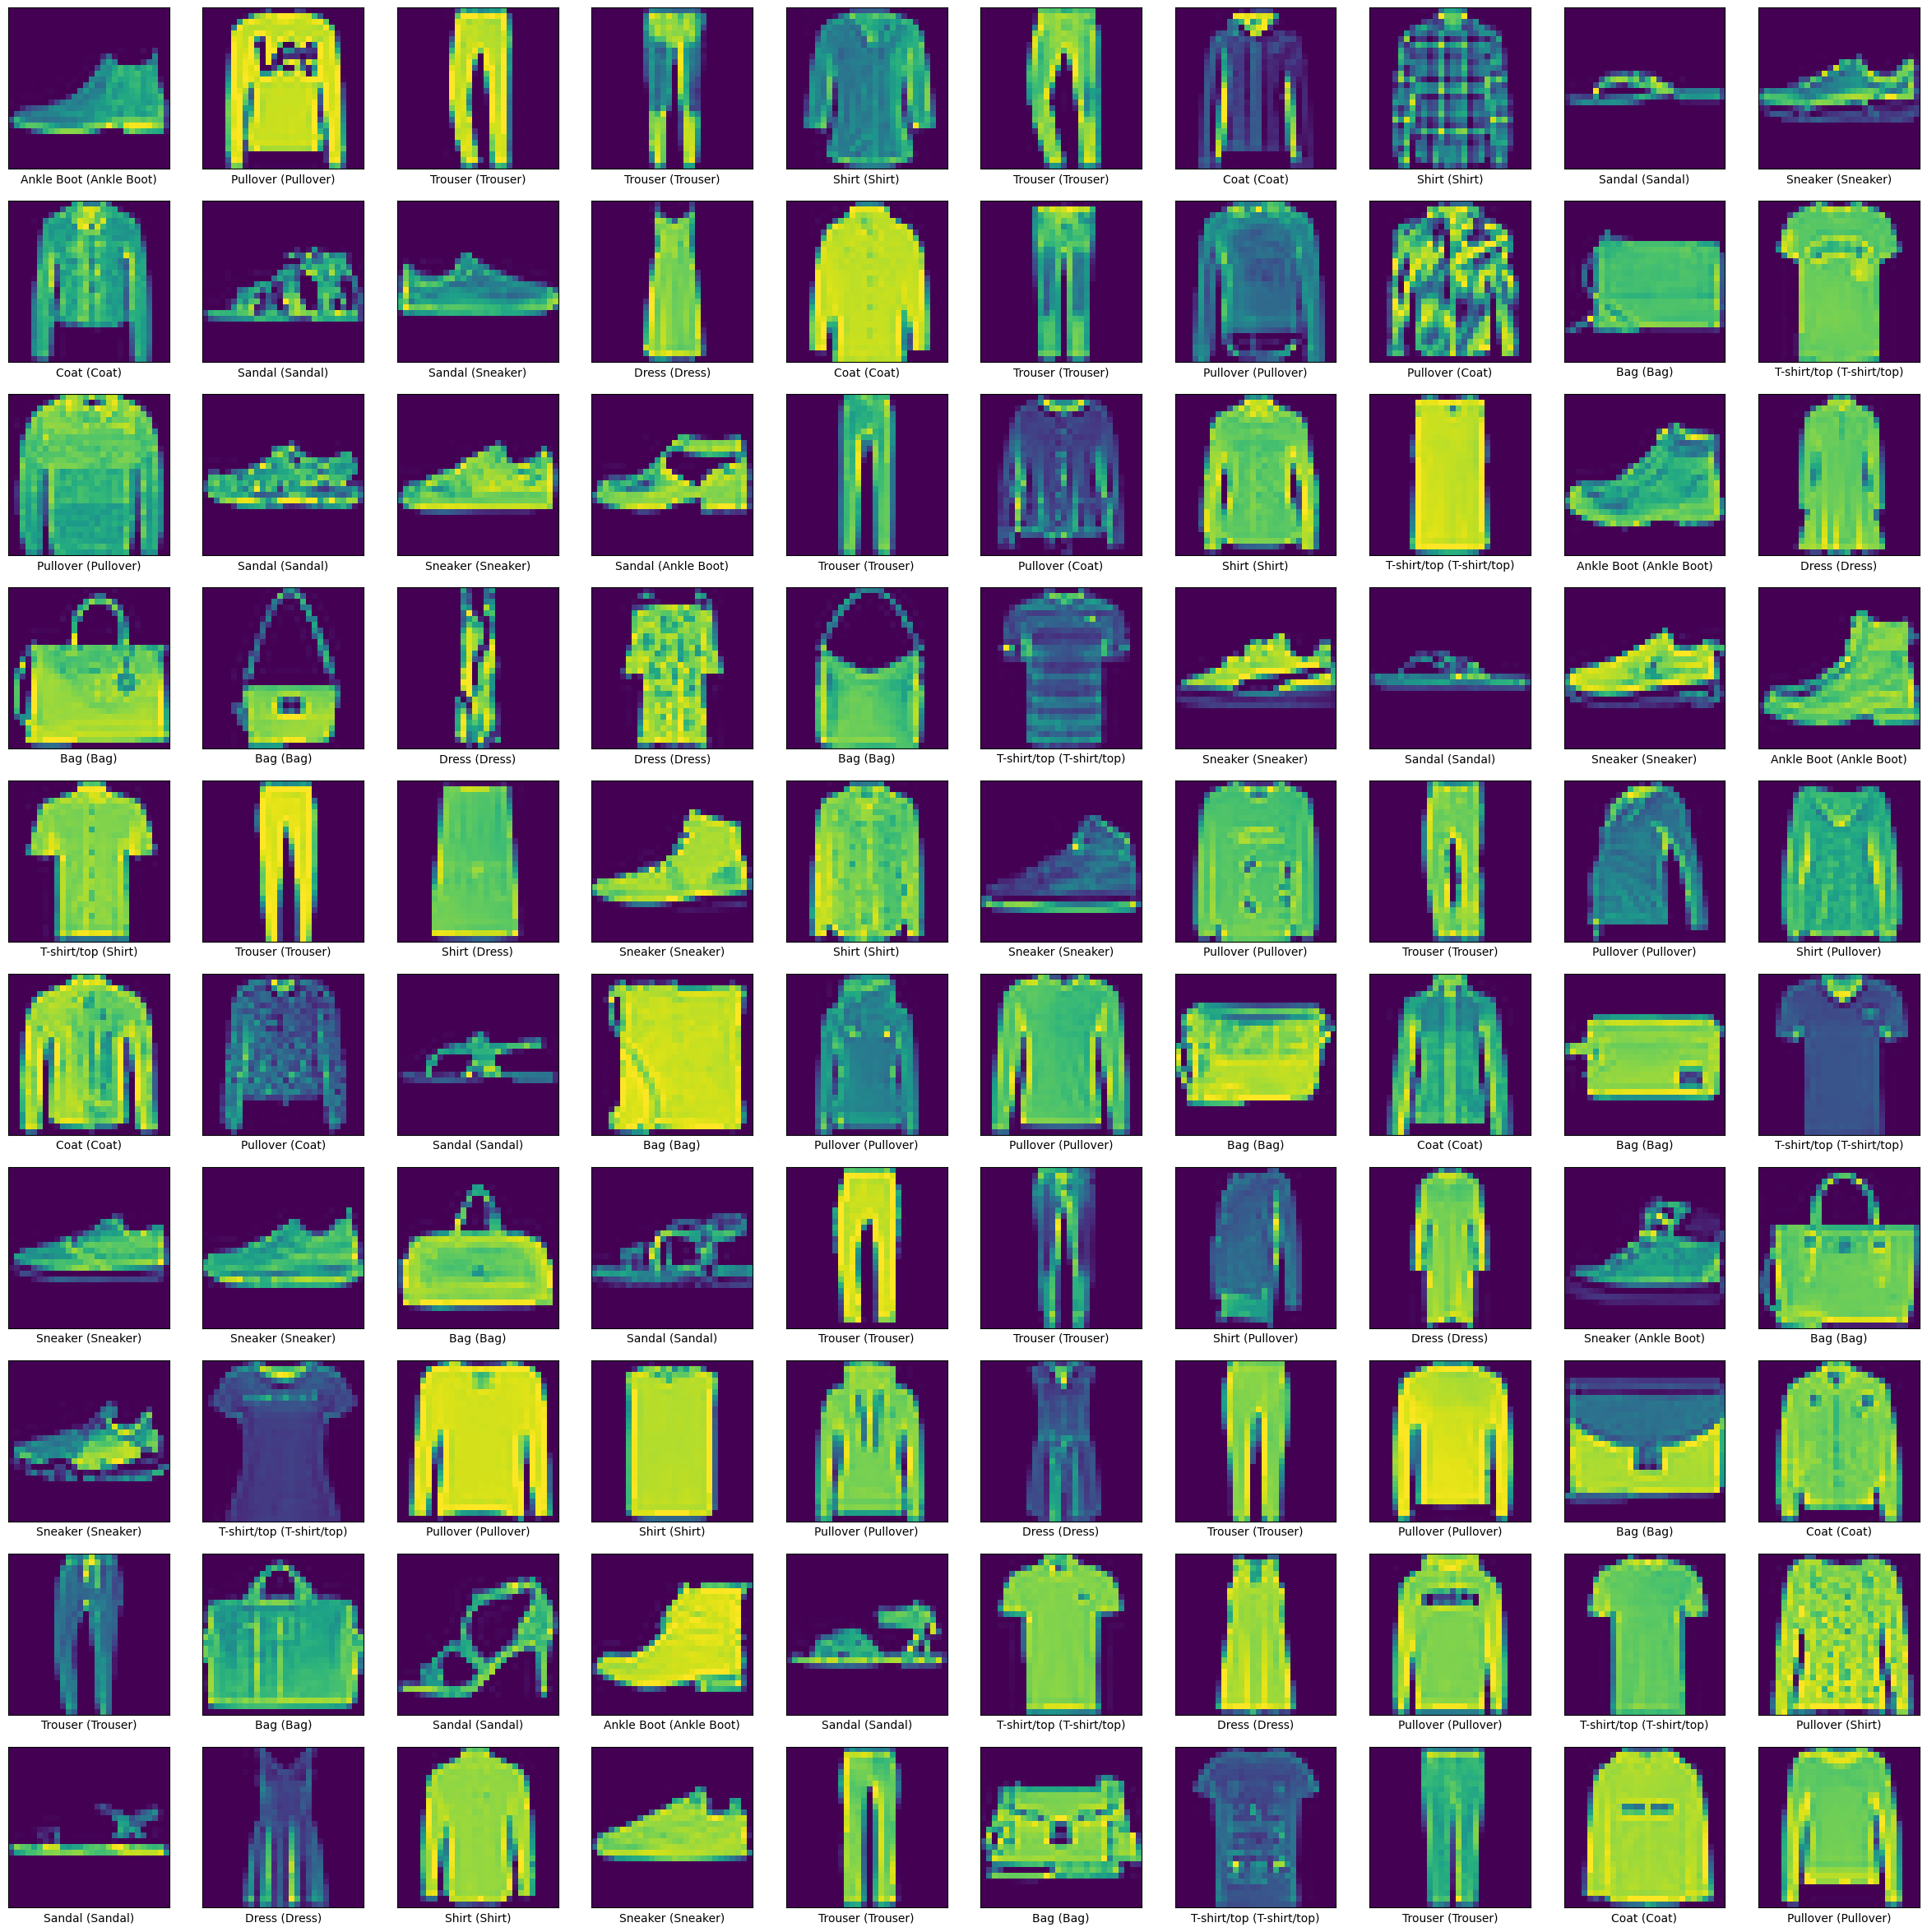

In [58]:
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10, 10, i+1),
    plt.xticks([]),
    plt.yticks([]),
    plt.imshow(test_images[i])
    predicted_label=(np.argmax(predictions[i]))
    true_label=test_labels[i]
    if predicted_label == true_label:
        color="green"
    else:
        color="red"

    plt.xlabel(
        "{} ({})".format(
            class_names[predicted_label],
            class_names[true_label],
            color=color
        )
    )